In [363]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [364]:
df=pd.read_csv("Aggregate_covid_country.csv")
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


# EDA

In [365]:
df.shape # checking the rows and cols count

(23688, 5)

In [366]:
df.columns # checking the various cols

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [367]:
df.dtypes # checking the datatypes of cols

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [368]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


Key Obseravtions here

mean and median have huge distance between them.
Also, 75% and max have huge gap . which shows outliers are present .
Now, different states may have different ratio of deaths due to covid. So , removing the outliers will not be good for data

In [369]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [370]:
df.isnull().sum() # null  values column wise counts

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

<AxesSubplot:>

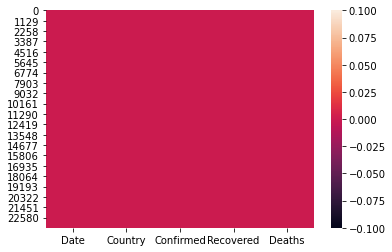

In [371]:
sns.heatmap(df.isnull())

There are no null values 


In [372]:
#univariate Analysis

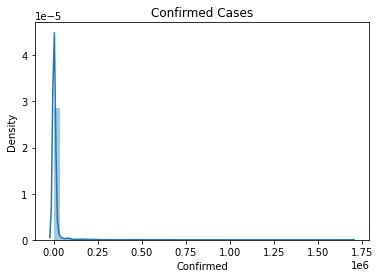

In [373]:
sns.distplot(df["Confirmed"])
plt.title("Confirmed Cases")
plt.show()

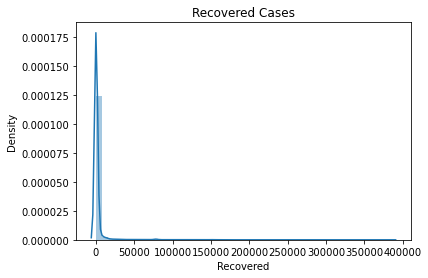

In [374]:
sns.distplot(df["Recovered"])
plt.title("Recovered Cases")
plt.show()

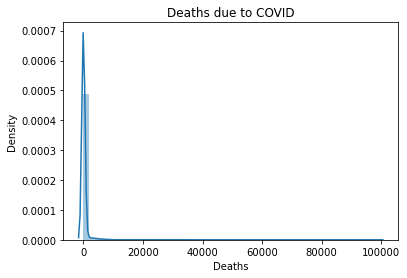

In [375]:
sns.distplot(df["Deaths"])
plt.title("Deaths due to COVID")
plt.show()

In [376]:
# univariate analysis shows all these features are positively skewed

In [377]:
#now bivariate analysis using scatter plot to check the relationship between features and target variable- Deaths

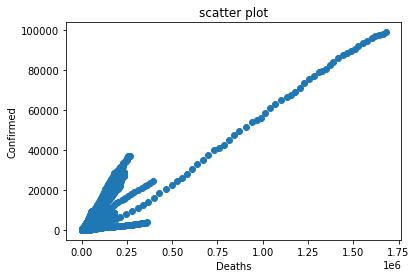

In [378]:
plt.scatter(df["Confirmed"],df["Deaths"])
plt.title("scatter plot")
plt.xlabel("Deaths")
plt.ylabel("Confirmed")
plt.show()

there is a positive linear relationship between confirmed cases and deaths due to covid

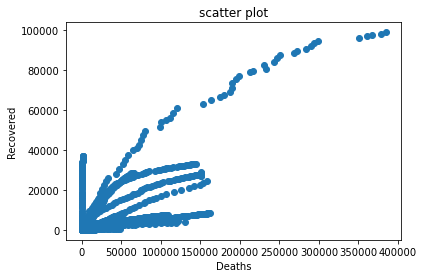

In [379]:
plt.scatter(df["Recovered"],df["Deaths"])
plt.title("scatter plot")
plt.xlabel("Deaths")
plt.ylabel("Recovered")
plt.show()

there is a positive linear relationship between recovered cases and deaths due to covid

In [380]:
#multivariate analysis

<AxesSubplot:>

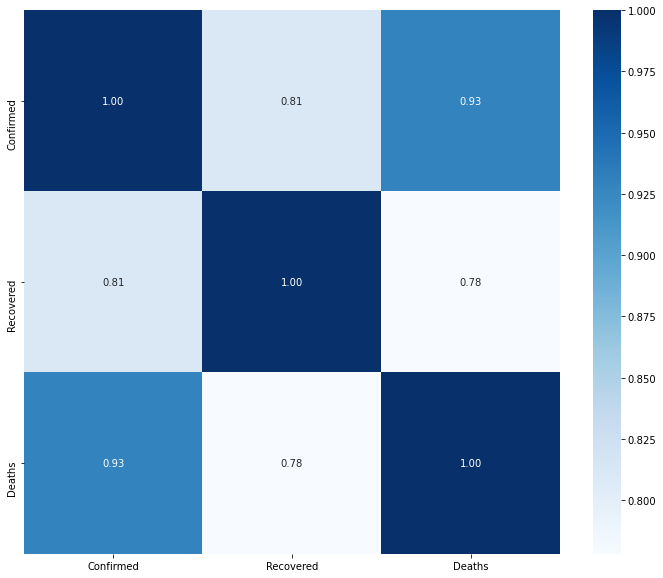

In [381]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f')

key observations here
confirmed cases are positively correlated with target 

#date variable may be dropped as it has no much related to predict deaths due to covid

In [382]:
df.drop(["Date"],axis=1,inplace=True)
df

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,0,0,0
1,Albania,0,0,0
2,Algeria,0,0,0
3,Andorra,0,0,0
4,Angola,0,0,0
...,...,...,...,...
23683,West Bank and Gaza,429,365,3
23684,Western Sahara,9,6,1
23685,Yemen,249,10,49
23686,Zambia,920,336,7


#transforming the categorical variables to numerical for data modelling using LabelEncoder

In [383]:
from sklearn.preprocessing import LabelEncoder

In [384]:
le=LabelEncoder()
df["Country"]=le.fit_transform(df["Country"].astype(str))

In [385]:
df["Country"].isnull().sum()

0

# handling Outliers

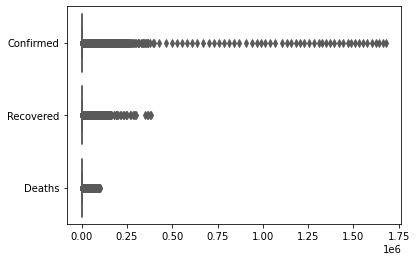

In [386]:
sns.boxplot(data=df[["Confirmed","Recovered","Deaths"]],orient='h',palette='Set2')
plt.show()

In [387]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [388]:
df_new=df[(z<3).all(axis=1)]
df_new

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
23683,183,429,365,3
23684,184,9,6,1
23685,185,249,10,49
23686,186,920,336,7


In [389]:
df.shape

(23688, 4)

In [390]:
df_new.shape

(23177, 4)

In [391]:
# dividing the x varaibles features from y variable target (Attrition)
df_x=df.drop(columns=['Deaths'])
#x=df_new.drop(columns=["Deaths"])
y_t=pd.DataFrame(df['Deaths'])

In [392]:
df_x.shape, y_t.shape

((23688, 3), (23688, 1))

In [393]:
df_new.skew()

Country     -0.005144
Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64

In [394]:
from sklearn.preprocessing import power_transform
df_x=power_transform(df_x,method='yeo-johnson')

In [395]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(df_x)

In [396]:
# finding the best random state

In [397]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [398]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y_t,test_size=.25,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=r2_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 99.84965695627554 Random state 91


In [399]:
# using the best random state

In [400]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=91)

In [401]:
print(x_train.shape , '\t'  , y_train.shape)

(17382, 3) 	 (17382, 1)


In [402]:
print(x_test.shape , '\t'  , y_test.shape)

(5795, 3) 	 (5795, 1)


 # Finding the best model

In [403]:
# importing our model libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [404]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [405]:
#using algorithms in for loops
model=[DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print("Score of " , m , "is" , m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print("Mean Absolute error  " , mean_absolute_error(y_test,y_pred))
    print("Mean Squared error \n",mean_squared_error(y_test,y_pred))
    print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("r2 score " , r2_score(y_test,y_pred))
    print("**********************************************************************\n")

Score of  DecisionTreeRegressor() is 0.9999997869015561
Mean Absolute error   16.189068162208798
Mean Squared error 
 24881.753204822166
Root mean Squared error is 
 157.73951060156796
r2 score  0.9454520291727015
**********************************************************************

Score of  RandomForestRegressor() is 0.99550252720328
Mean Absolute error   17.467367691583654
Mean Squared error 
 17933.38608908693
Root mean Squared error is 
 133.91559315138372
r2 score  0.9606848515388132
**********************************************************************

Score of  KNeighborsRegressor() is 0.9748477509040124
Mean Absolute error   15.903123382226058
Mean Squared error 
 22793.0623986195
Root mean Squared error is 
 150.97371426383964
r2 score  0.9500310411187692
**********************************************************************

Score of  GradientBoostingRegressor() is 0.9446031484104924
Mean Absolute error   50.77032718964706
Mean Squared error 
 67898.46699551889
Root mean 

In [406]:
# cross validate models
from sklearn.model_selection import cross_val_score
model=[DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x_t,y_t,cv=4,scoring='r2')
    print("Score of " , m , "is: ")
    print("Score" , score)
    print("Mean score" , score.mean())
    print("Standard Deviation is " , score.std())
    print("**********************************************************************\n")

Score of  DecisionTreeRegressor() is: 
Score [0.23208457 0.90556225 0.67722965 0.71514711]
Mean score 0.6325058943017813
Standard Deviation is  0.24684347078243496
**********************************************************************

Score of  RandomForestRegressor() is: 
Score [-0.97445835  0.89400496  0.77908366  0.79128094]
Mean score 0.3724778035691343
Standard Deviation is  0.7789338799361064
**********************************************************************

Score of  KNeighborsRegressor() is: 
Score [0.94793001 0.70629244 0.54706096 0.81842909]
Mean score 0.7549281257944025
Standard Deviation is  0.14735695487627024
**********************************************************************

Score of  GradientBoostingRegressor() is: 
Score [-0.58500598  0.8163037   0.80010039  0.7890869 ]
Mean score 0.4551212522732027
Standard Deviation is  0.6005957633025064
**********************************************************************



# hyperparameter tuning

In [407]:
# randomForestRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [408]:
# Create the parameter grid based on the results of random search 
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [409]:
rfr = RandomForestRegressor(random_state = 159)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [410]:
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'n_estimators': 11}


In [411]:
# using RandomForestRegressor with best parameters
rf=RandomForestRegressor(max_depth=None,bootstrap=True,n_estimators=11)
rf.fit(x_train,y_train)
print(" Score is ",rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print("Mean Absolute error  " , mean_absolute_error(y_test,predrf))
print("Mean Squared error \n",mean_squared_error(y_test,predrf))
print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,predrf)))
print("r2 score " , r2_score(y_test,predrf))
print("**********************************************************************\n")

 Score is  0.9945410416504512
Mean Absolute error   18.527789663383043
Mean Squared error 
 19911.93688603643
Root mean Squared error is 
 141.10966262462833
r2 score  0.9563472982215729
**********************************************************************



# Conclusion
RandomForestregressor is best performing model with r2Score 96%

In [412]:
a=np.array(y_test)
a

array([[17],
       [ 0],
       [ 0],
       ...,
       [86],
       [ 0],
       [ 3]])

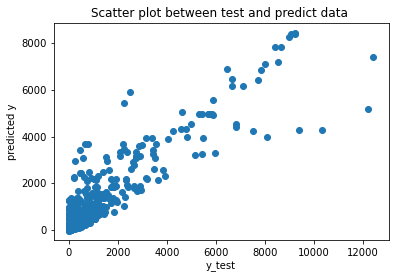

In [413]:
#plotting scatter between test data and predict data
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("predicted y")
plt.title("Scatter plot between test and predict data ")
plt.show()

# Saving the model- Serialization

In [414]:
# saving the prediction model

import pickle
filename="CovidData.pkl"
pickle.dump(predrf,open(filename,'wb'))